In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


Data Cleaning

In [12]:
df['Production (Tons)']=df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(".","").str.replace(",",".")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")

In [14]:
df.rename(columns={"Production (Tons)": "Production(Tons)"},inplace = True)
df.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"},inplace =True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace = True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace = True)


In [16]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [18]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [20]:
df[df['Yield(Kg/Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [22]:

df = df.dropna().reset_index()

In [24]:


df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [26]:
df.drop(["index","Unnamed: 0"],axis = 1 ,inplace = True)	

In [28]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [30]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [32]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)']=df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)

In [34]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [36]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

Univariate Anaysis

In [39]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [41]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

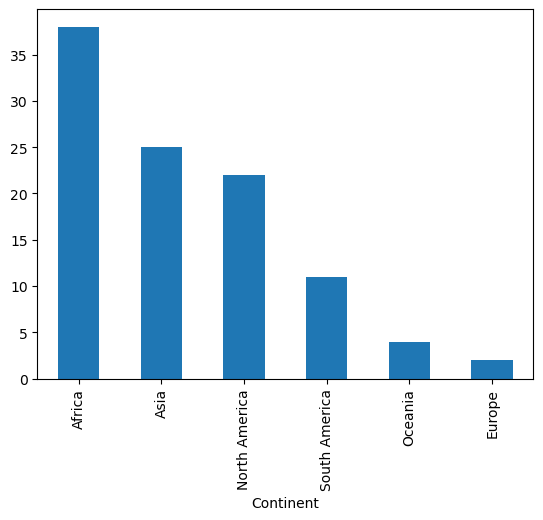

In [43]:
df['Continent'].value_counts().plot(kind = "bar")

C:\msys64\ucrt64\bin\ipykernel_19228\868539649.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\msys64\ucrt64\bin\ipykernel_19228\868539649.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person(Kg)'])
C:\msys64\ucrt64\bin\ipykernel_19228\8685

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

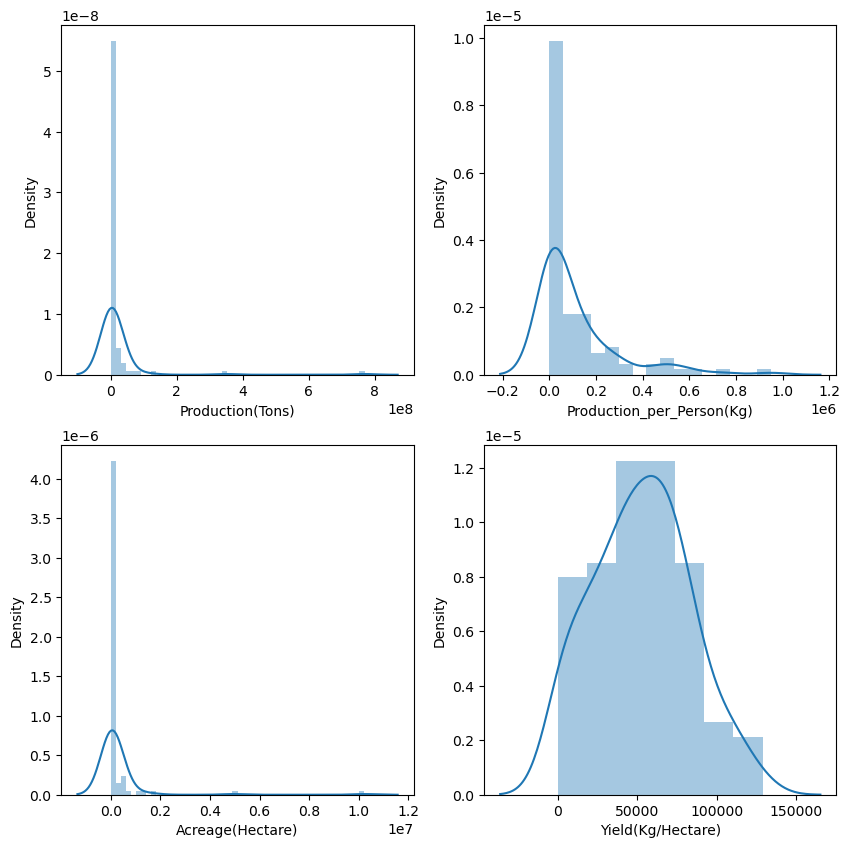

In [54]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])


<Axes: ylabel='Yield(Kg/Hectare)'>

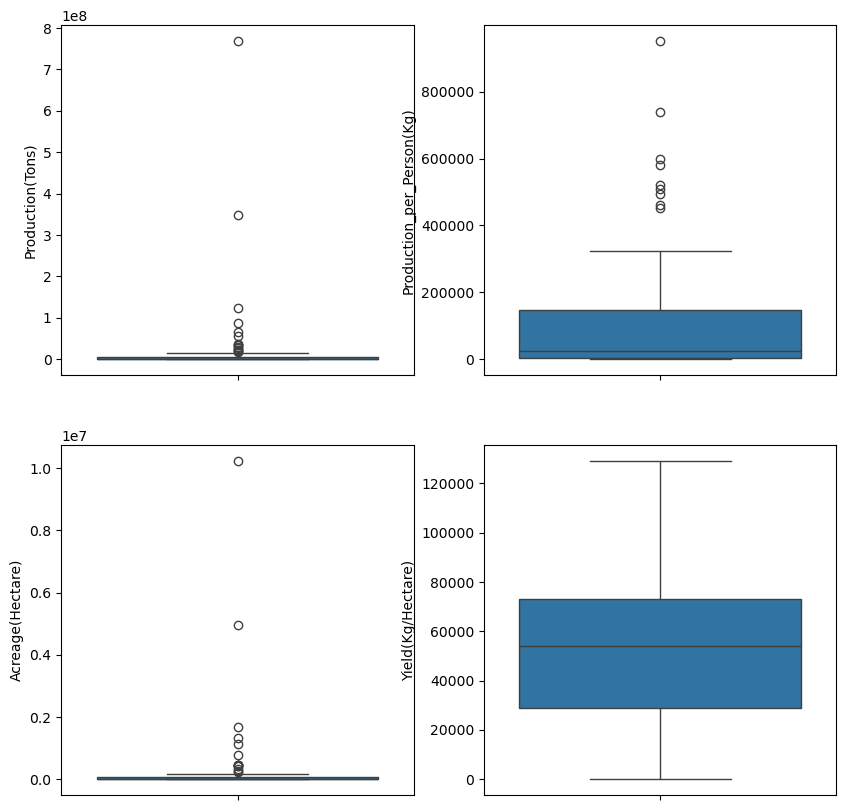

In [56]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])


In [58]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


Bivariate Analysis

In [61]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [63]:
df_new = df[['Country','Production(Tons)']].set_index('Country')

In [65]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [67]:
df_new['Production(Tons)_percent'] = df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [69]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

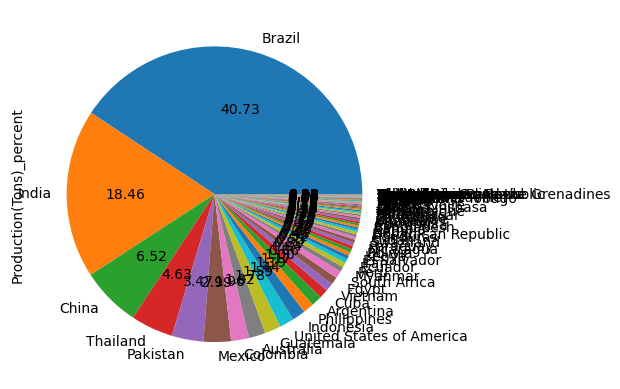

In [71]:
df_new['Production(Tons)_percent'].plot(kind = "pie",autopct = "%.2f")

<Axes: xlabel='Country'>

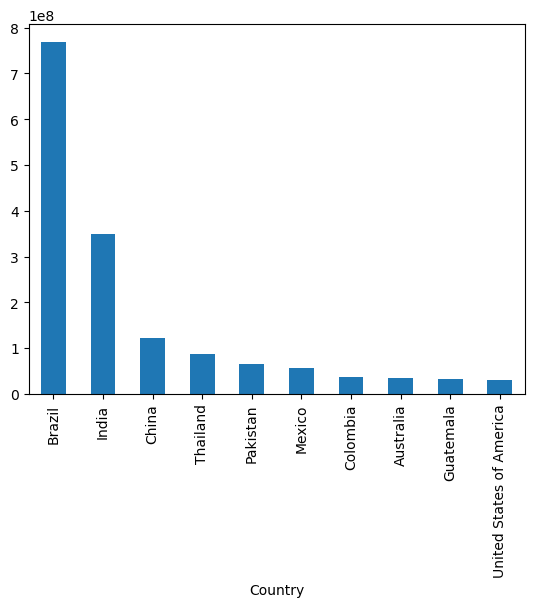

In [73]:
df_new['Production(Tons)'].head(10).plot(kind = "bar")

C:\msys64\ucrt64\bin\ipykernel_19228\391249405.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


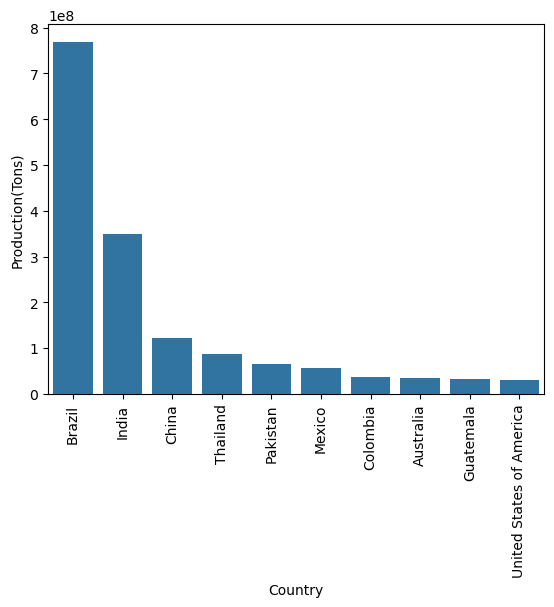

In [79]:
ax = sns.barplot(data = df.head(10),x = "Country", y = 'Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

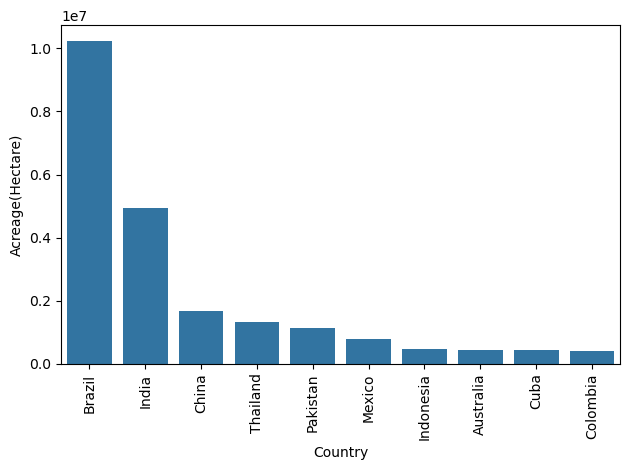

In [91]:
df_acr = df.sort_values('Acreage(Hectare)', ascending=False).head(10)

# Create barplot
ax = sns.barplot(data=df_acr, x="Country", y="Acreage(Hectare)")

# Rotate x-axis labels 
plt.xticks(rotation=90)

#  layout and show plot
plt.tight_layout()
plt.show()


Which Country  has highest yeild per hectare?


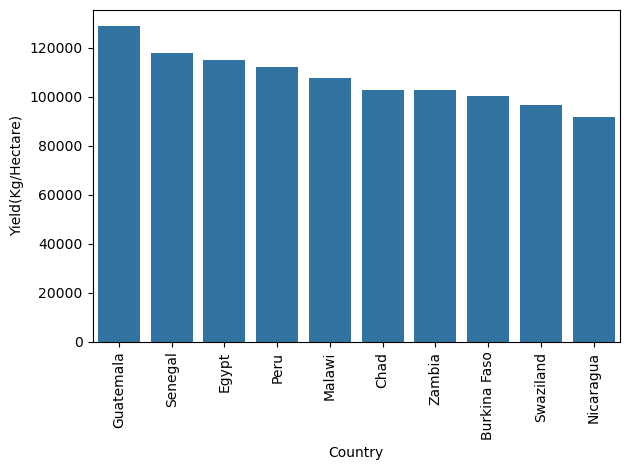

In [99]:
df_yeild = df.sort_values('Yield(Kg/Hectare)', ascending=False).head(10)

# Create barplot
ax = sns.barplot(data=df_yeild, x="Country", y="Yield(Kg/Hectare)")

# Rotate x-axis labels 
plt.xticks(rotation=90)

#  layout and show plot
plt.tight_layout()
plt.show()

Which Country has the highest production/person

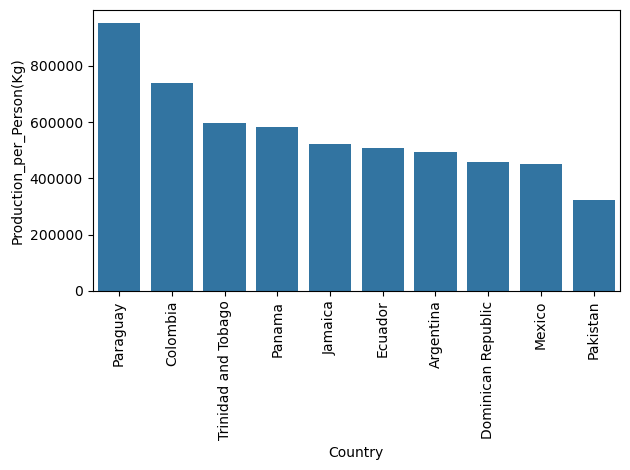

In [101]:
df_person = df.sort_values('Production_per_Person(Kg)', ascending=False).head(10)

# Create barplot
ax = sns.barplot(data=df_person, x="Country", y="Production_per_Person(Kg)")

# Rotate x-axis labels
plt.xticks(rotation=90)

#  layout and show plot
plt.tight_layout()
plt.show()

Correlation

In [106]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

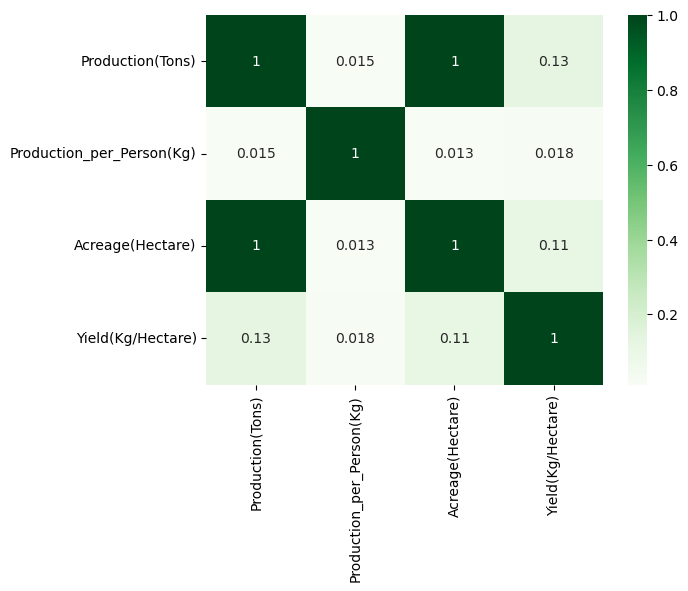

In [116]:
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap="Greens")

Do countries with highest land produce more sugercane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

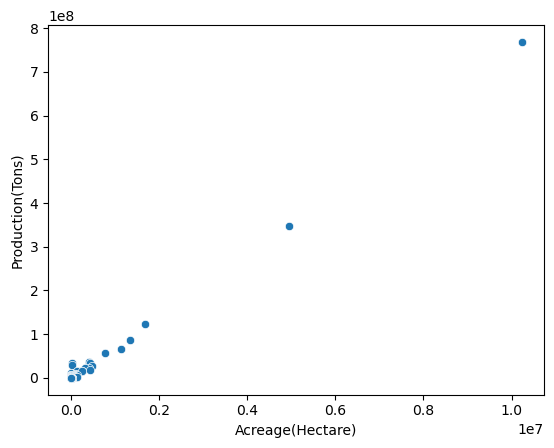

In [123]:
sns.scatterplot(data = df,x='Acreage(Hectare)',y='Production(Tons)')

Do countries which yield more sugercane per hectare producs more sugercane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

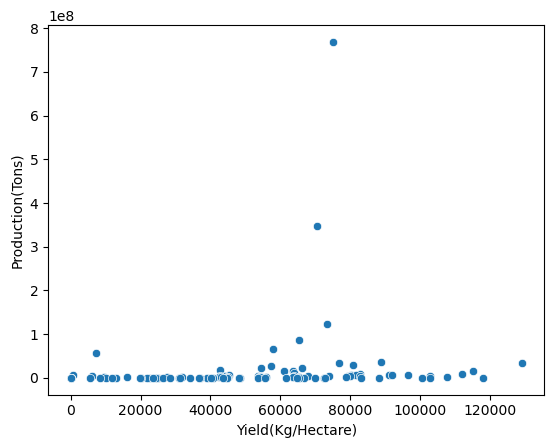

In [128]:
sns.scatterplot(data = df,x='Yield(Kg/Hectare)',y='Production(Tons)')

Analysis  for Continent

In [131]:
df_continent = df.groupby('Continent').sum()

In [133]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


Which country produces maximum sugercane?


In [144]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

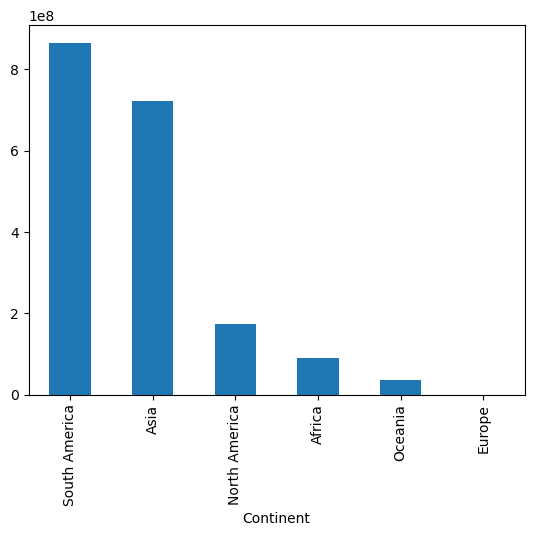

In [148]:
df_continent['Production(Tons)'].sort_values(ascending = False).plot(kind = "bar")

<Axes: xlabel='Continent'>

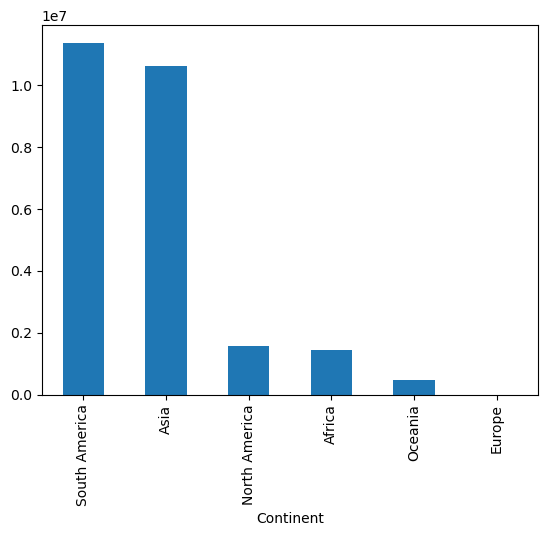

In [150]:
df_continent['Acreage(Hectare)'].sort_values(ascending = False).plot(kind = "bar")

Do number of countries in a continent effects production of sugercane?

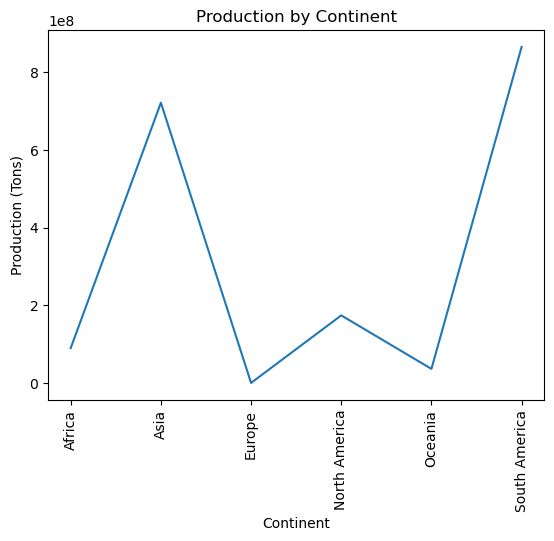

In [165]:
sns.lineplot(x=continent_names, y=df_continent['Production(Tons)'])
plt.xticks(rotation=90)
plt.xlabel('Continent')
plt.ylabel('Production (Tons)')
plt.title('Production by Continent')
plt.show()


Production distribution by continent

<Axes: ylabel='Production(Tons)'>

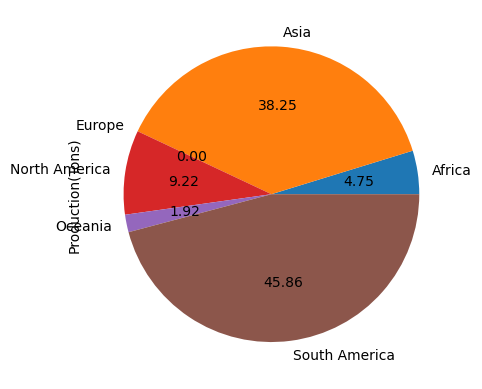

In [173]:
df_continent['Production(Tons)'].plot(kind = 'pie',autopct ="%.2f")

Correlation foe Continent

In [170]:
df_continent.corr(numeric_only = True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.522211,0.994897,0.091201
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000
